# Chapter 3: Linear Regression:
# Excerises: Applied

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

### 8. This question involves the use of simple linear regression on the Auto data set.

#### 8.a Use function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use function to print the results. Comment on the output.

In [29]:
auto = pd.read_csv("Data/Auto.csv", na_values='?').dropna()
# auto.info()
# auto.head(3)
est = smf.ols('mpg ~ horsepower', auto).fit()
print(est.summary())
print(auto[['mpg','horsepower']].describe())

# pred = est.get_prediction()
# print(pred.summary_frame())
np.sqrt(est.scale)

regr = skl_lm.LinearRegression()
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X,y)
regr.predict(X=[[98]])


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Oct 2019   Prob (F-statistic):           7.03e-81
Time:                        15:03:01   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

array([24.46707715])

#### i)  Is there a relationship between the predictor and the re- sponse?
Yes, ther is a relationship between horsepower and mpg as deterined by testing the null hypothesis of all regression coefficients equal to zero. Since the F-statistic is far larger than 1 and the p-value of the F-statistic is close to zero we can reject the null hypothesis and state there is a statistically significant relationship between horsepoder and mpg.
#### ii)  How strong is the relationship between the predictor and the response?
To calculate the residual error relative to the response we use the mean of the response and the RSE. The mean of mpg is <font color=red> 23.4459</font>. The RSE of the function was<font color=red>4.906</font> which indicates a percentage error of <font color=red>20.9248%</font>. The $R^2$ of the function was about <font color=red>0.605</font> meaning <font color=red>60.5948%</font> of the variance in mpg is explained by horsepower.
#### iii) Is the relationship between the predictor and the response positive or negative?
The relationship between mpg and horsepower is negative. The more horsepower an automobile has the linear regression indicates the less mpg fuel efficiency the automobile will have.
#### iv)  What is the predicted mpg associated with a horsepower of 98?
<font color=red>24.47</font>

#### 8b. Plot the response and the predictor. Use the abline() function to display the least squares regression line.

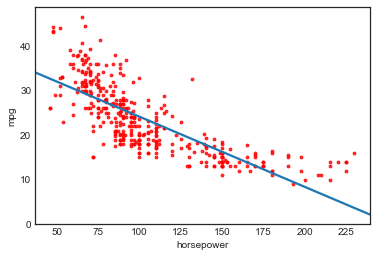

In [37]:
sns.regplot(x = auto.horsepower, y = auto.mpg, ci = None, scatter_kws = {'color':'r','s':8})

#### 8c. Use the function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

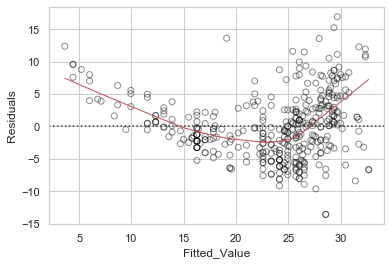

In [65]:
auto['Fitted_Value'] = regr.predict(X)
auto['Residuals'] = auto.mpg - auto.pred1
sns.residplot(auto.Fitted_Value, auto.Residuals, lowess=True, 
             line_kws={'color':'r','lw':1},
             scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})

Based on the residuals plots, there is some evidence of non-linearity.

### 9. This question involves the use of multiple linear regression on the Auto data set.

#### a. Produce a scatterplot matrix which includes all of the variables in the data set.

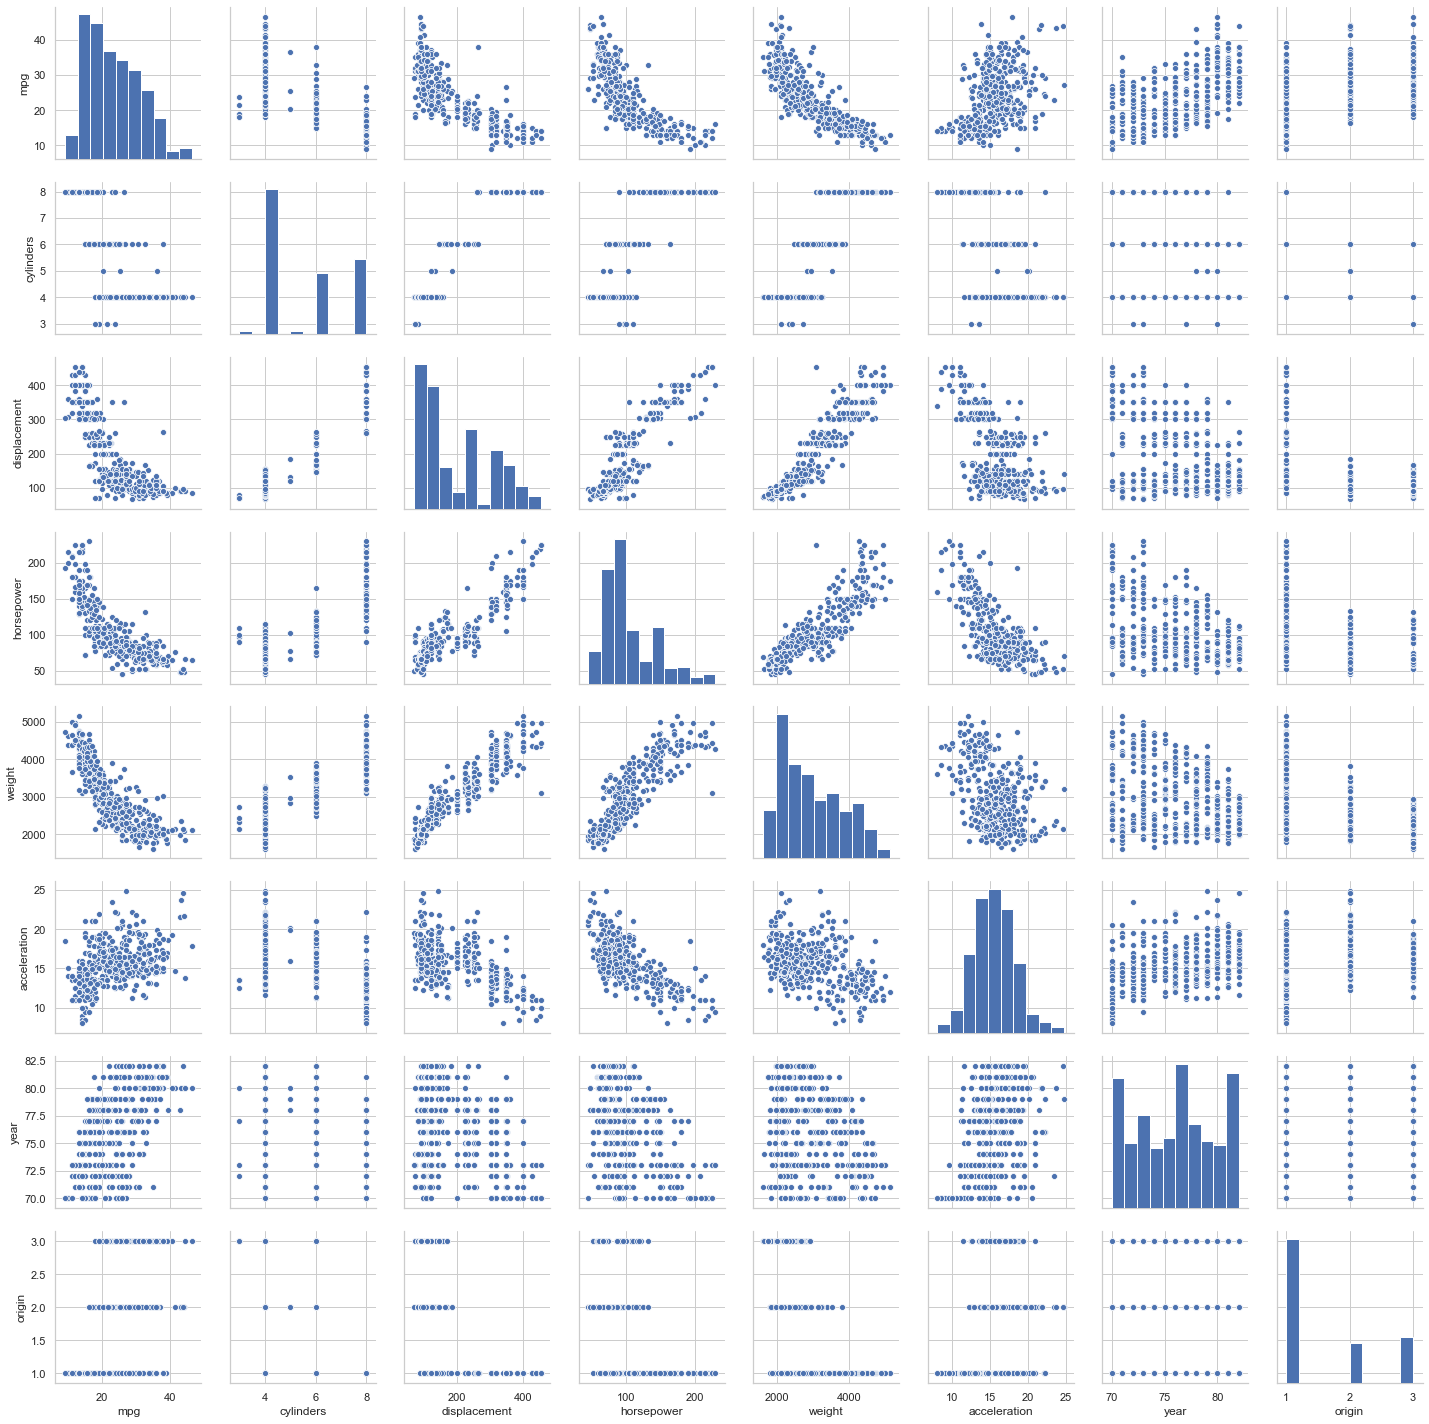

In [67]:
sns.pairplot(auto[['mpg','cylinders','displacement','horsepower','weight','acceleration','year','origin','name']])

#### b. Compute the matrix of correlations between the variables. You will need to exclude the name variable, which is qualitative.

In [78]:
corr = auto.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,pred1,resid1,Fitted,Residuals,Fitted_Value
mpg,1,-0.78,-0.81,-0.78,-0.83,0.42,0.58,0.57,0.78,0.63,0.78,0.63,0.78
cylinders,-0.78,1,0.95,0.84,0.9,-0.5,-0.35,-0.57,-0.84,-0.19,-0.84,-0.19,-0.84
displacement,-0.81,0.95,1,0.9,0.93,-0.54,-0.37,-0.61,-0.9,-0.17,-0.9,-0.17,-0.9
horsepower,-0.78,0.84,0.9,1,0.86,-0.69,-0.42,-0.46,-1,-6.1e-17,-1,-6.1e-17,-1
weight,-0.83,0.9,0.93,0.86,1,-0.42,-0.31,-0.59,-0.86,-0.25,-0.86,-0.25,-0.86
acceleration,0.42,-0.5,-0.54,-0.69,-0.42,1,0.29,0.21,0.69,-0.18,0.69,-0.18,0.69
year,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1,0.18,0.42,0.41,0.42,0.41,0.42
origin,0.57,-0.57,-0.61,-0.46,-0.59,0.21,0.18,1,0.46,0.34,0.46,0.34,0.46
pred1,0.78,-0.84,-0.9,-1,-0.86,0.69,0.42,0.46,1,-5.9e-17,1,-5.9e-17,1
resid1,0.63,-0.19,-0.17,-6.1e-17,-0.25,-0.18,0.41,0.34,-5.9e-17,1,-5.9e-17,1,-5.9e-17


#### c. Use the lm() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summary() function to print the results. Comment on the output. For instance:
i. Is there a relationship between the predictors and the re- sponse?
ii. Which predictors appear to have a statistically significant relationship to the response?
iii. What does the coefficient for the year variable suggest?